In [2]:
#Loading and Understanding the Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("StudentsPerformance.csv")

In [6]:
print("Bsic information")
df.info()

Bsic information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Dataset Shape(Rows,Columns)
df.shape

(1000, 8)

In [9]:
#First 5 Rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#Column Names:
df.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [11]:
#Missing Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Data Cleaning & Exploration

In [17]:
sns.set(style="whitegrid")

In [19]:
df.duplicated().sum()

0

In [20]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


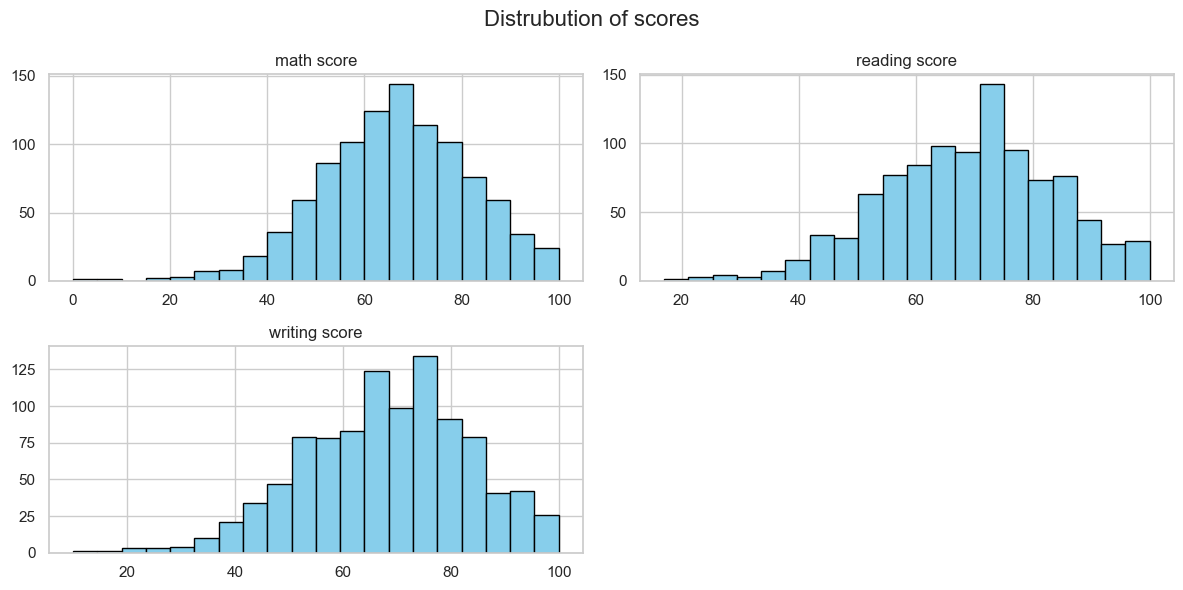

In [24]:
#Histogram of Scores
score_columns=['math score','reading score','writing score']
df[score_columns].hist(bins=20,figsize=(12,6),color='skyblue',edgecolor='black')
plt.suptitle('Distrubution of scores',fontsize=16)
plt.tight_layout()
plt.show()

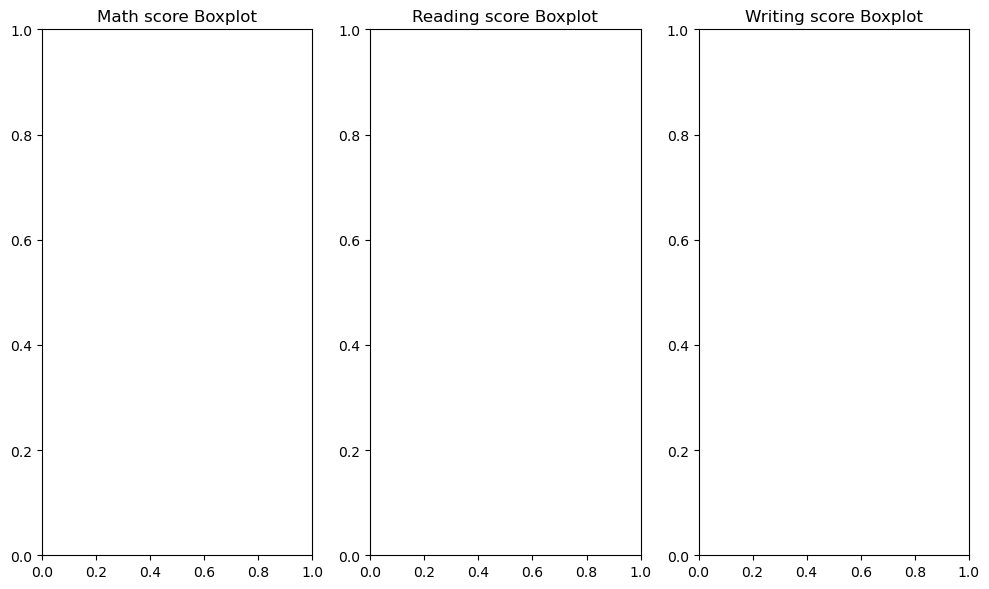

In [13]:
score_columns = ['math score', 'reading score', 'writing score']

# Plot boxplots
plt.figure(figsize=(10, 6))
for i, subject in enumerate(score_columns, 1):
    plt.subplot(1, 3, i)
   # sns.boxplot(y=df[subject], color='lightcoral')
    plt.title(f'{subject.capitalize()} Boxplot')
plt.tight_layout()
plt.show()

In [26]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
print("\n🆕 Sample rows with 'average score':\n", df[['math score', 'reading score', 'writing score', 'average score']].head())



🆕 Sample rows with 'average score':
    math score  reading score  writing score  average score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


In [ ]:
#Visual Analysis

In [27]:
sns.set(style="whitegrid")

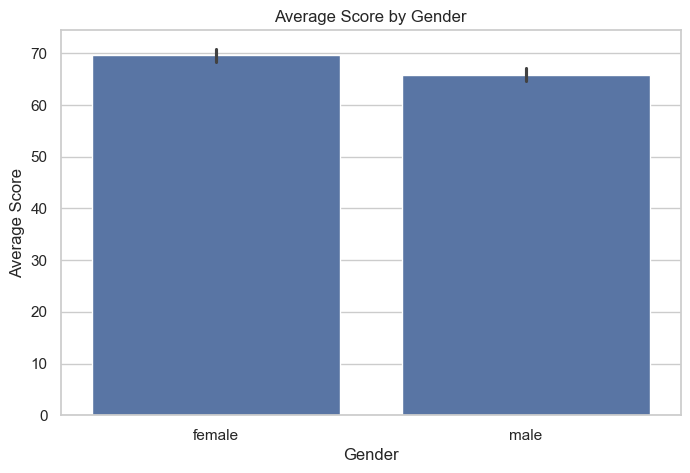

In [34]:
# 1. Average Scores by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="average score", data=df)
plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.show()

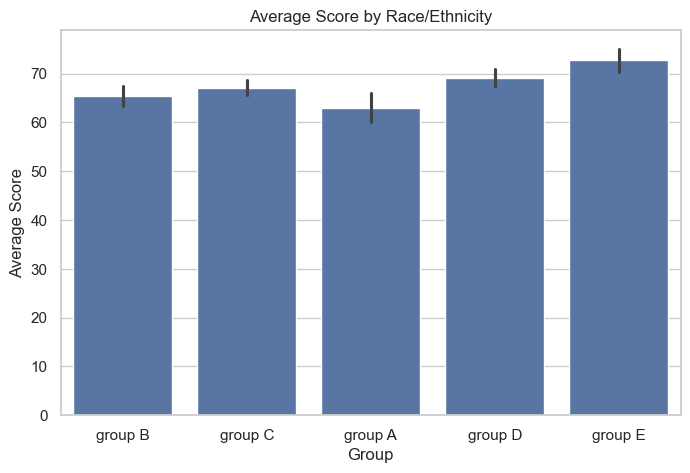

In [37]:
# 2. Average Scores by Race/Ethnicity Group
plt.figure(figsize=(8, 5))
sns.barplot(x="race/ethnicity", y="average score", data=df)
plt.title("Average Score by Race/Ethnicity")
plt.ylabel("Average Score")
plt.xlabel("Group")
plt.show()

C:\Users\labha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


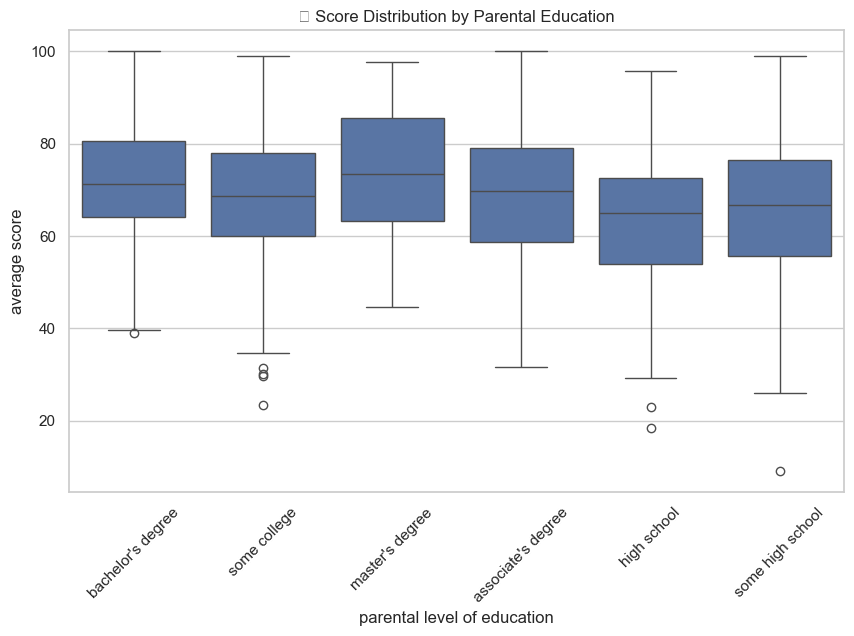

In [38]:
# 3. Average Scores by Parental Education
plt.figure(figsize=(10, 6))
sns.boxplot(x="parental level of education", y="average score", data=df)
plt.title("📚 Score Distribution by Parental Education")
plt.xticks(rotation=45)
plt.show()

In [8]:
# 4. Lunch Type Impact on Scores
plt.figure(figsize=(8, 5))
sns.boxplot(x="lunch", y="average score", data=df)
plt.title("🍽️ Average Score by Lunch Type")
plt.show()

NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

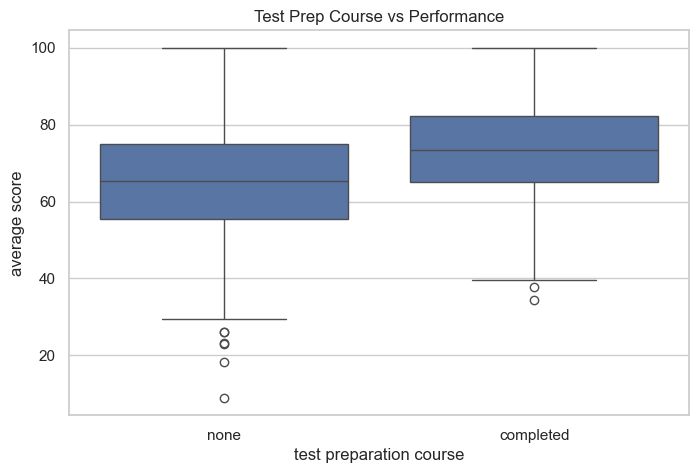

In [41]:
# 5. Test Preparation Course vs Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x="test preparation course", y="average score", data=df)
plt.title("Test Prep Course vs Performance")
plt.show()

In [2]:
# 6. Correlation Heatmap for Numeric Features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'plt' is not defined

In [44]:
df['performance level'] = df['average score'].apply(lambda x: 'High' if x >= 70 else 'Low')


In [46]:
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 3. Define features and label
X = df_encoded[categorical_cols + ['math score', 'reading score', 'writing score']]
y = df_encoded['performance level']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97
Confusion Matrix:
 [[ 86   4]
 [  2 108]]
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.96      0.97        90
         Low       0.96      0.98      0.97       110

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [48]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

🌳 Random Forest Accuracy: 0.98
🌲 Decision Tree Accuracy: 0.97


In [50]:
#Linear Regression Model

# Define features (X) and target (y)
X_reg = df_encoded[categorical_cols + ['math score', 'reading score', 'writing score']]
y_reg = df_encoded['average score']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train the model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predict on test data
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))

📉 Mean Squared Error (MSE): 0.0
📊 R² Score: 1.0
